# Homework 5

# Prep

This is my final homework for the class.  I will start by importing needed packages and looking at the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# ML Packages
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from numpy import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.utils import shuffle

The first thing I need to do is bring in the data.

In [4]:
#Import the data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

Now that I have my Data I want to look at how it is distributed.

In [5]:
print(X.shape, y.shape)

(70000, 784) (70000,)


Great, there are 70,000 entries with 784 variable.

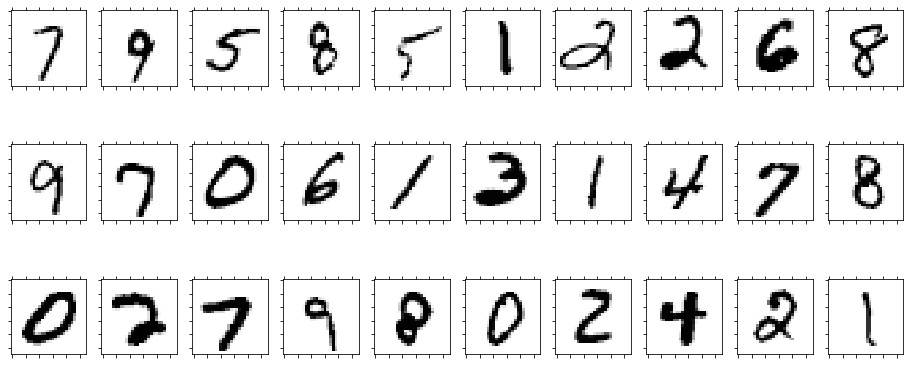

In [6]:
# Randomization of variable order - to pick a variety of entries, since they are currently ordered
rndm = np.random.permutation(X.shape[0])

# Dataframe for data
features = ['pixel' + str(i) for i in range(X.shape[1])]
dfX = pd.DataFrame(X, columns = features)

# Plot the graph
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.matshow(dfX.loc[rndm[i]].values.reshape((28,28)).astype(float), cmap = 'Greys')
plt.show()

Awesome, the data makes sense.  I can see and interpret the numbers, but I will need to help the computer read a flattened version of the data.

[Text(0,0.5,'Value count'), Text(0.5,0,'Number')]

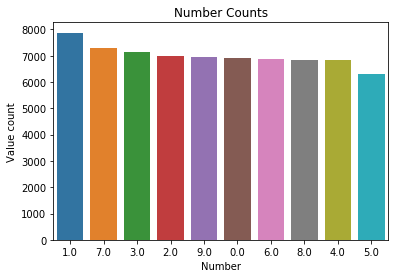

In [7]:
ax = sns.barplot(data=pd.DataFrame(y)[0].value_counts().to_frame().transpose())
ax.set_title('Number Counts')
ax.set(xlabel='Number', ylabel='Value count')

It seems as though the data is evenly distributed between numbers.

# PCA 

Use PCA to reduce the dimensionality

#### a. How many components did you use? Why?

Text(0.5,1,'How Many Components?')

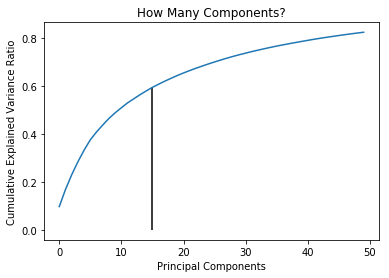

In [6]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[15],x=15)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('How Many Components?')

Here I use the explained variance ration method of finding the correct amount of components.  I look at the first 50 principal components and I find that at the 15th component the rate of reduction in variance begins to decrease.  So 15 is my "elbow".

#### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

In [30]:
# Use PCA to find the first two components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

Text(0,0.5,'Second Component')

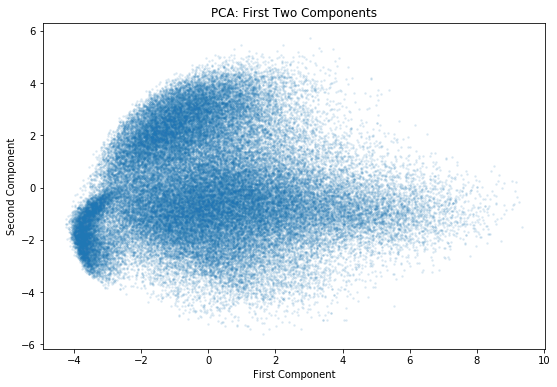

In [31]:
fig = plt.figure(figsize=(9,6))
plt.scatter(X_2dim[:,0], X_2dim[:,1], marker='.', alpha=.1, s = 10)
plt.title('PCA: First Two Components')
plt.xlabel('First Component')
plt.ylabel('Second Component')

I am unable to find a strong trend using only the first two components.  This is not very surprising since each entry has 784 defining variables.

#### c. Why would you use PCA? What is it doing? And what are the drawbacks?

We learned in class that "PCA can also be used for compression, since you can reverse the transformation - see p.216 of hands on machine learning for an example. There are also a few other flavors of PCA:

-Incremental PCA - Calculates PCA using mini-batches and is useful for large data and online data
-Randomized PCA - A stocastic PCA solver that can be much faster when the number of components is much smaller than the size of the data
-Kernel PCA - can use kernels similar to SVM and can be effective at preserving clusters after projection"

PCA is great for removing noise from data.  The downside to this that it removes low variance components.

#### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

For this I will try looking at three different images and then compress them.

Text(0.5,1,'Original Image 1')

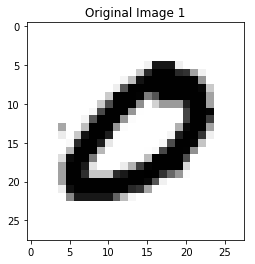

In [9]:
# Original Image
plt.imshow(X[50].reshape((28,28)), cmap='Greys')
plt.title('Original Image 1')

Text(0.5,1,'Original Image 2')

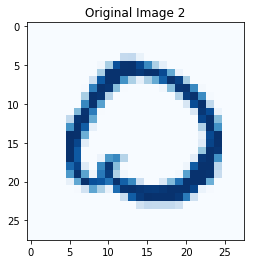

In [10]:
# Original Image 2
plt.imshow(X[100].reshape((28,28)), cmap='Blues')
plt.title('Original Image 2')

Text(0.5,1,'Original Image 3')

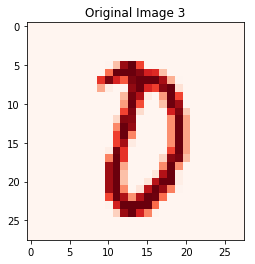

In [11]:
# Original Image 3
plt.imshow(X[150].reshape((28,28)), cmap='Reds')
plt.title('Original Image 3')

Text(0.5,1,'Transformed Image 1')

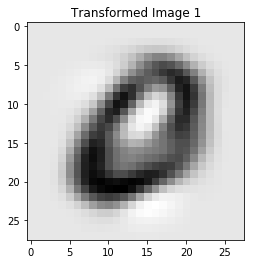

In [12]:
# Two principal components 
pca = PCA(n_components=3)
X_2dim = pca.fit_transform(X)
X_back_to_noraml = pca.inverse_transform(X_2dim)

# Plot the same image that has been compressed and then inversed transformed
plt.imshow(X_back_to_noraml[50].reshape((28,28)), cmap='Greys')
plt.title('Transformed Image 1')

Text(0.5,1,'Transformed Image 2')

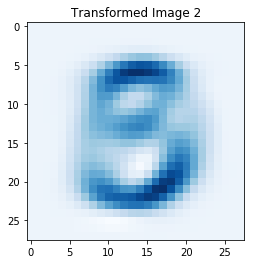

In [13]:
# Two principal components 
pca = PCA(n_components=3)
X_2dim = pca.fit_transform(X)
X_back_to_noraml = pca.inverse_transform(X_2dim)

# Plot the same image that has been compressed and then inversed transformed
plt.imshow(X_back_to_noraml[100].reshape((28,28)), cmap='Blues')
plt.title('Transformed Image 2')

Text(0.5,1,'Transformed Image 3')

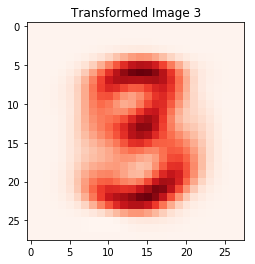

In [14]:
# Two principal components 
pca = PCA(n_components=3)
X_2dim = pca.fit_transform(X)
X_back_to_noraml = pca.inverse_transform(X_2dim)

# Plot the same image that has been compressed and then inversed transformed
plt.imshow(X_back_to_noraml[150].reshape((28,28)), cmap='Reds')
plt.title('Transformed Image 3')

Ok that helped a bit.  I will try and compress the first image using more components to see if that will help.

Text(0.5,1,'Transformed Image 1')

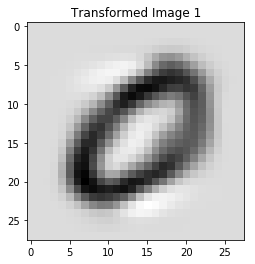

In [15]:
# Two principal components 
pca = PCA(n_components=15)
X_2dim = pca.fit_transform(X)
X_back_to_noraml = pca.inverse_transform(X_2dim)

# Plot the same image that has been compressed and then inversed transformed
plt.imshow(X_back_to_noraml[50].reshape((28,28)), cmap='Greys')
plt.title('Transformed Image 1')

It is a bit clearer, but there is more work to be done.

# t-SNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    

    

    

In [16]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Run TSNE with two-components
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 3.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.374016
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.508232
[t-SNE] Error after 1000 iterations: 1.651728


Great! It took a little while to run, but it worked.  Now I can plot the first two components.

In [17]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'t-SNE plot')

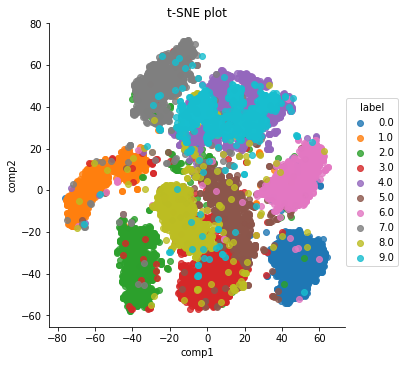

In [18]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE plot')

#### a. How does this plot differ from your PCA plot?

The t-SNE plot makes identifying trends and characteristics much easier.  Using colors we can see how each handwritten number is grouped.

#### b. How robust is it to changes in perplexity?

In [19]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Run TSNE with two-components, decrease perplexity
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 2.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.911912
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.566071
[t-SNE] Error after 1000 iterations: 1.883354


Text(0.5,1,'t-SNE plot')

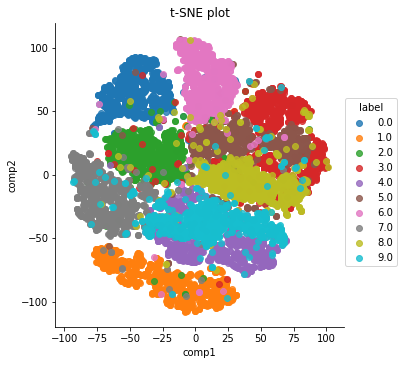

In [20]:
# Create dataframe of results
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

# Create the plot
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE plot')

These results do not seem to be robust.  I changed the perplexity from 50 to ten and the component locations seem to have shifted a bit.  The data seems a bit more polarizied, but nothing significant.

#### c. How robust is it to different learning rate and number of iterations?

In [21]:
# Use a random sample with 1000 points
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

# Do t-SNE with two components
tsne = TSNE(n_components=2, verbose=1, perplexity=19, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 58 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.788583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.898994
[t-SNE] Error after 1000 iterations: 1.009708


Text(0.5,1,'t-SNE plot')

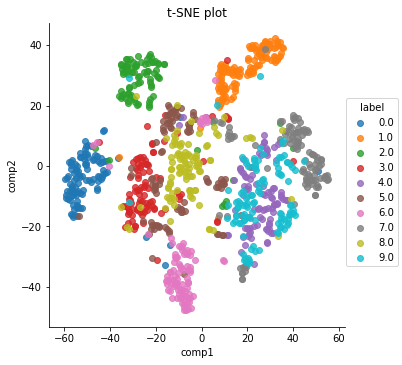

In [22]:
# Create dataframe of results
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

# Create the plot
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE plot')

Awesome.  It seems as though decreasing the number of iterations has helped.  The sections that have been plotted seem more defined less heterogenous.  I am not exactly sure how to create perfect parameters, however, it is clear that playing around with the hyperparameters is important.

# k-means

Perform k-means clustering 

#### a. How did you choose k?

I chose k=10 because there are 10 unique numbers and it is is close to the elbow I found using PCA.

#### b. How did you evaluate your clustering?

In [24]:
# Scale the data
X_scaled = preprocessing.scale(X)

# Take sample of the data
X_scaled = shuffle(X_scaled)[0:3000]

# Two first components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X_scaled)

# Create Pandas DataFrame
df = pd.DataFrame({'1st':X_2dim[:,0], '2nd':X_2dim[:,1]})

In [25]:
# Evaluate clustering via the Silhouette Coefficient
kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1).fit(df[['1st', '2nd']])
labels = kmeans_model.labels_
silhouette_score(df[['1st', '2nd']], labels, metric='euclidean')

0.52259086409179367

The coefficient is .52, which is pretty good.

#### c. Visualize your clusters using t-sne

In [27]:
# Do t-SNE with two components
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_scaled)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.149s...
[t-SNE] Computed neighbors for 3000 samples in 12.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 4.049702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.476189
[t-SNE] Error after 1000 iterations: 1.406287


Text(0.5,1,'t-SNE with K-Means')

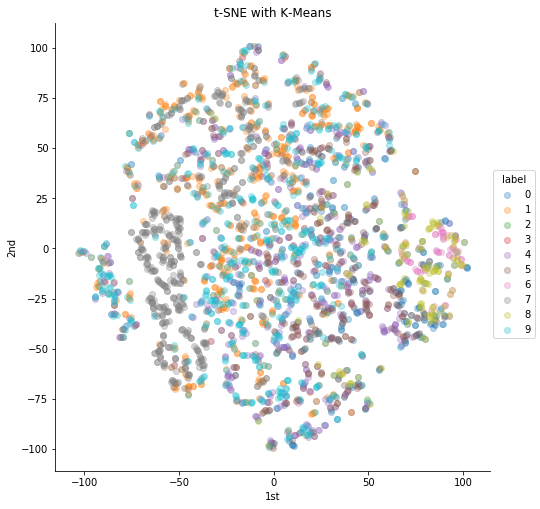

In [28]:
# Create dataframe of results
df_tsne = pd.DataFrame(tsne_results, columns=['1st', '2nd'])
df_tsne['label'] = labels

# Create the plot
sns.lmplot(x='1st', y='2nd', data=df_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=7)
plt.title('t-SNE with K-Means')

#### d. Did you scale your data?

Yes. using "X_scaled = preprocessing.scale(X)"

#### e. How robust is your clustering?

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.119s...
[t-SNE] Computed neighbors for 3000 samples in 13.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 4.049702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.543060
[t-SNE] Error after 1000 iterations: 1.400107


Text(0.5,1,'t-SNE with K-Means')

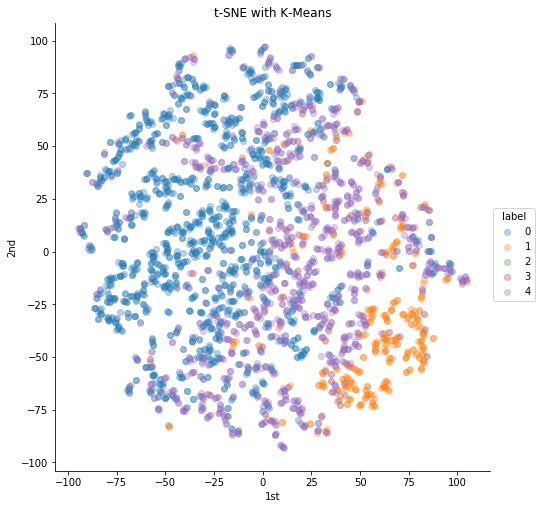

In [29]:
# Evaluate clustering via the Silhouette Coefficient
kmeans_model = KMeans(n_clusters=5, n_init=5, n_jobs=-1).fit(df[['1st', '2nd']])
labels = kmeans_model.labels_

# Do t-SNE with two components
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_scaled)

# Create dataframe of results
df_tsne = pd.DataFrame(tsne_results, columns=['1st', '2nd'])
df_tsne['label'] = labels

# Create the plot
sns.lmplot(x='1st', y='2nd', data=df_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=7)
plt.title('t-SNE with K-Means')

Not extremely robust.  You can tell that certain colors are more prominent in different areas, but there is no clear seperation.

# Hierarchical clustering

Perform hierarchical clustering

#### a. Plot your dendrogram

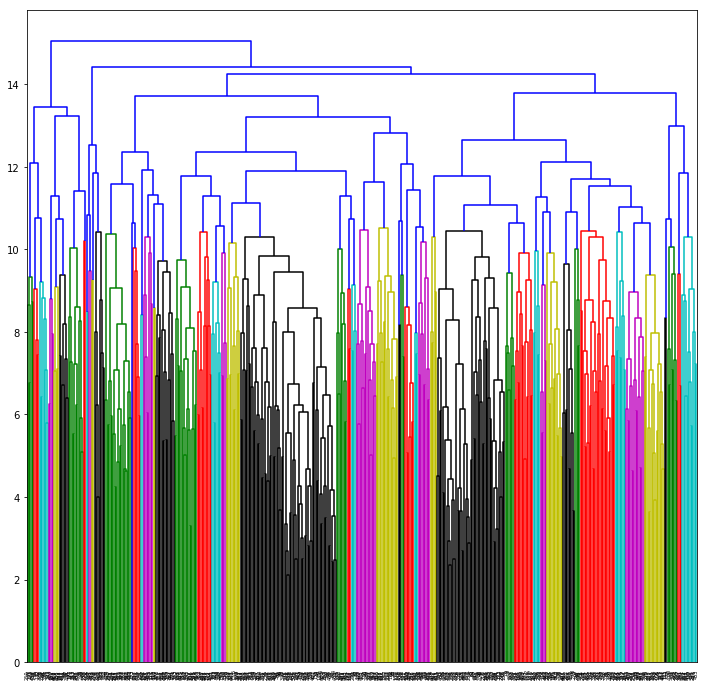

In [8]:
X_shuffled = shuffle(X)
Z = linkage(X_shuffled[0:500], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Using the full data takes too long.  So I used shuffle(x).

#### b. How many clusters seem reasonable based off your graph?

This graph seems like it contains far too much information.  By drawing a line horizontally where y=13 we can define 10 clusters.  I believe this is a good guess using an inprecise method.

#### c. How does your dendrogram change with different linkage methods?

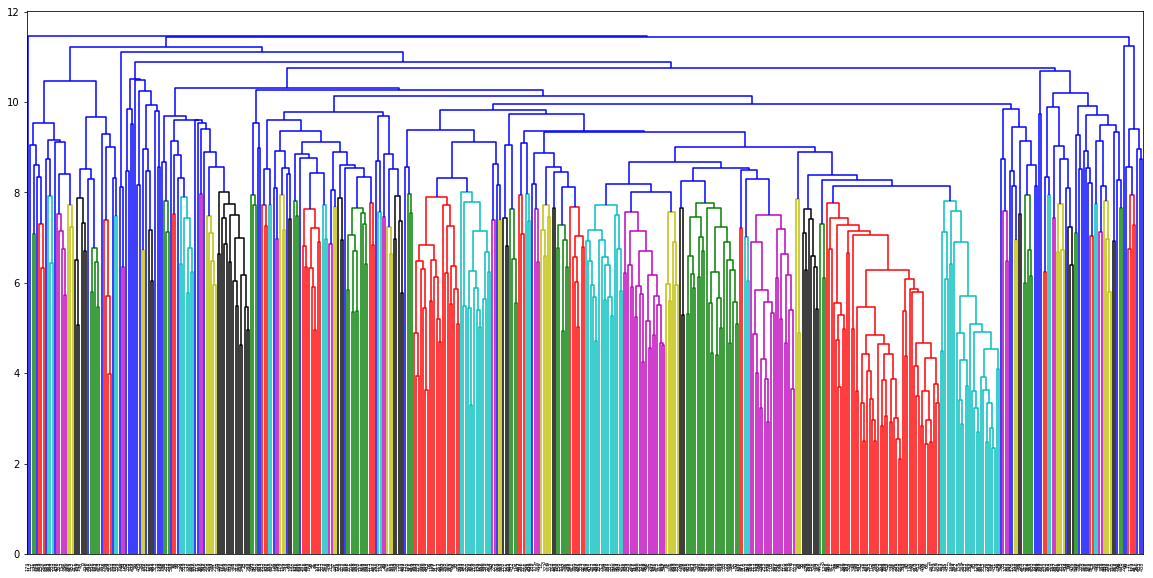

In [9]:
Z = linkage(X_shuffled[0:500], 'average')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)

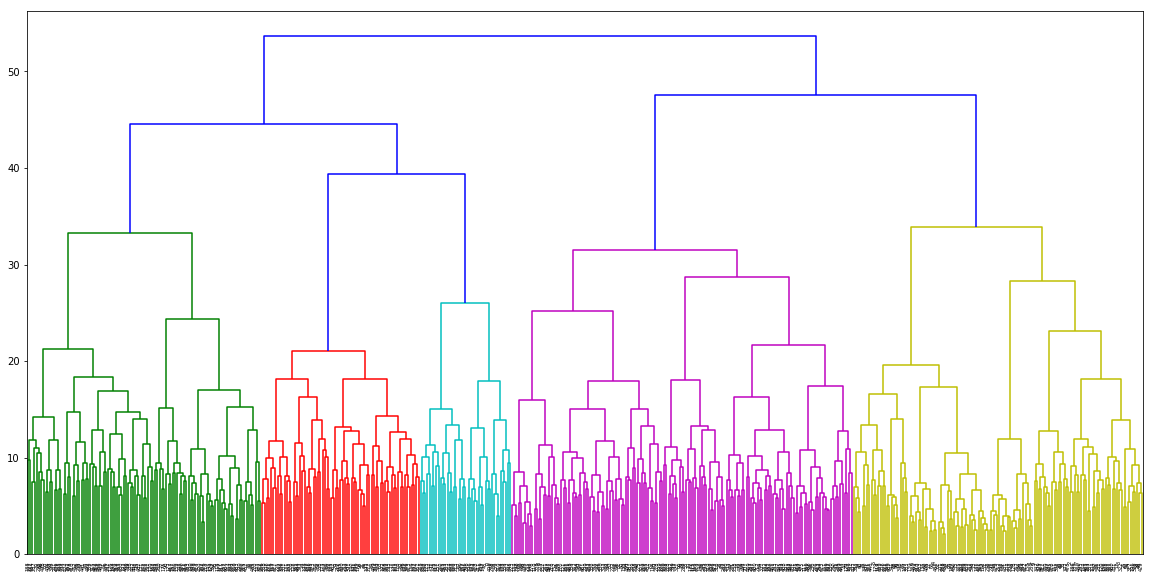

In [10]:
Z = linkage(X_shuffled[0:500], 'ward')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)

The clusters become much clearer using certain methods.  Using the ward method created a much easier to read chart.  The clusters are easier to define even if it seems over simplified.

Thank you!